# Úkol 4

Stáhni si data o výsledcích marketingové kampaně jedné portugalské banky, které jsou v souboru [ukol_04_data.csv](ukol_04_data.csv). Data mají následující proměnné.

První skupina proměnných zahrnuje obecné informace o klientovi/klientce.

- age = věk (číslo)
- job = typ zaměstnání (kategorická proměnná, obsahuje následující možnostti: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
- marital = rodinný stav (kategorická proměnná, obsahuje možnosti "married","divorced","single", "divorced" zahrnuje rozvedené i ovdovělé)
- education = vzdělání (kategorická proměnná, obsahuje následující možnosti: "unknown","secondary","primary","tertiary")
- default = má úvěr v prodlení (binární proměnná, obsahuje možnosti "yes","no")
- balance = průměrný zůstatek na účtu (numerická proměnná, v eurech)
- housing: má úvěr na bydlení (binární proměnná, obsahuje možnosti "yes", "no")
- loan:  má osobní půjčku (binární proměnná, zahrnuje možnosti "yes","no")

Druhá skupina proměnných se týká posledního kontaktu v aktuální kampani

- contact = způsob navázání kontaktu (kategorická proměnná, obsahuje možnosti "unknown","telephone","cellular")
- day = den v měsíci posledního kontaktu (číselná proměnná)
- month = měsíc posledního kontaktu (kategoriální proměnná, obsahuje možnosti "jan", "feb", "mar", …, "nov", "dec")
- duration = délka posledního kontaktu v sekundách (číselná proměnná)

Třetí skupina obsahuje zbývající vstupní proměnné

- campaign = počet kontaktů během aktuální kampaně (včetně posledního, číselná proměnná)
- pdays = počet dnů uplynulých od posledního kontaktu s klientem (číselná proměnná, obsahuje -1, pokud klient/klientka zatím nebyl(a) kontaktována)
- previous = počet kontaktů před stávající kampaní (číselná proměnná)
- poutcome = výsledek předchozí kampaně (kategorická proměnná, obsahuje možnosti "unknown","other","failure","success")

Výstupní proměnná
- y = informace, zda si klient/klientka založil(a) termínovaný účet (binární proměnná, obsahuje možnosti ano/ne)

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
import six # Tato knihovna je vyžadována pro použití StringIO ve spojení s pydotplus.
from six import StringIO 
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

data_base = pd.read_csv("ukol_04_data.txt") # základní df před případnými úpravami dat
data_base.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
# definice proměnných: X - vstupní proměnná , y - cílová proměnná

var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"] 
var_numeric = ["age", "balance", "duration", "pdays", "previous"] 

# přeměna var_kategorical

encoder = OneHotEncoder()
encoded_var = encoder.fit_transform(data_base[var_categorical])
encoded_var = encoded_var.toarray()

# přeměna var_numeric

numeric = data_base[var_numeric].to_numpy()

X = np.concatenate([encoded_var, numeric], axis=1) # vstupní proměnná
y= data_base["y"] # cílová proměnná

In [3]:
y.value_counts()

y
no     43922
yes     5810
Name: count, dtype: int64

Pro splnění úkolu je třeba provést následující body.

- Vytvoř rozhodovací strom na základě všech vstupních proměnných, s výjimkou proměnných `day` a `month`. Výstupní proměnnou je informace, zda si klient založní termínovaný účet. Omez výšku stromu na 4 patra a vygeneruj obrázek (v rámci Jupyter notebooku nebo jej ulož jako samostatný obrázek). Kategoriální proměnné uprav pomocí OneHotEncoder, číselné proměnné nijak upravovat nemusíš. Dále vytvoř matici záměn a urči výši metriky `accuracy`.


In [4]:
# rozdělení dat na testovací a trénovací sadu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# klasifikátor - rozhodovací strom (základní parametry)- 4 patra, popisky v grafu

clf_tree = DecisionTreeClassifier(max_depth=4)
clf_tree = clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)

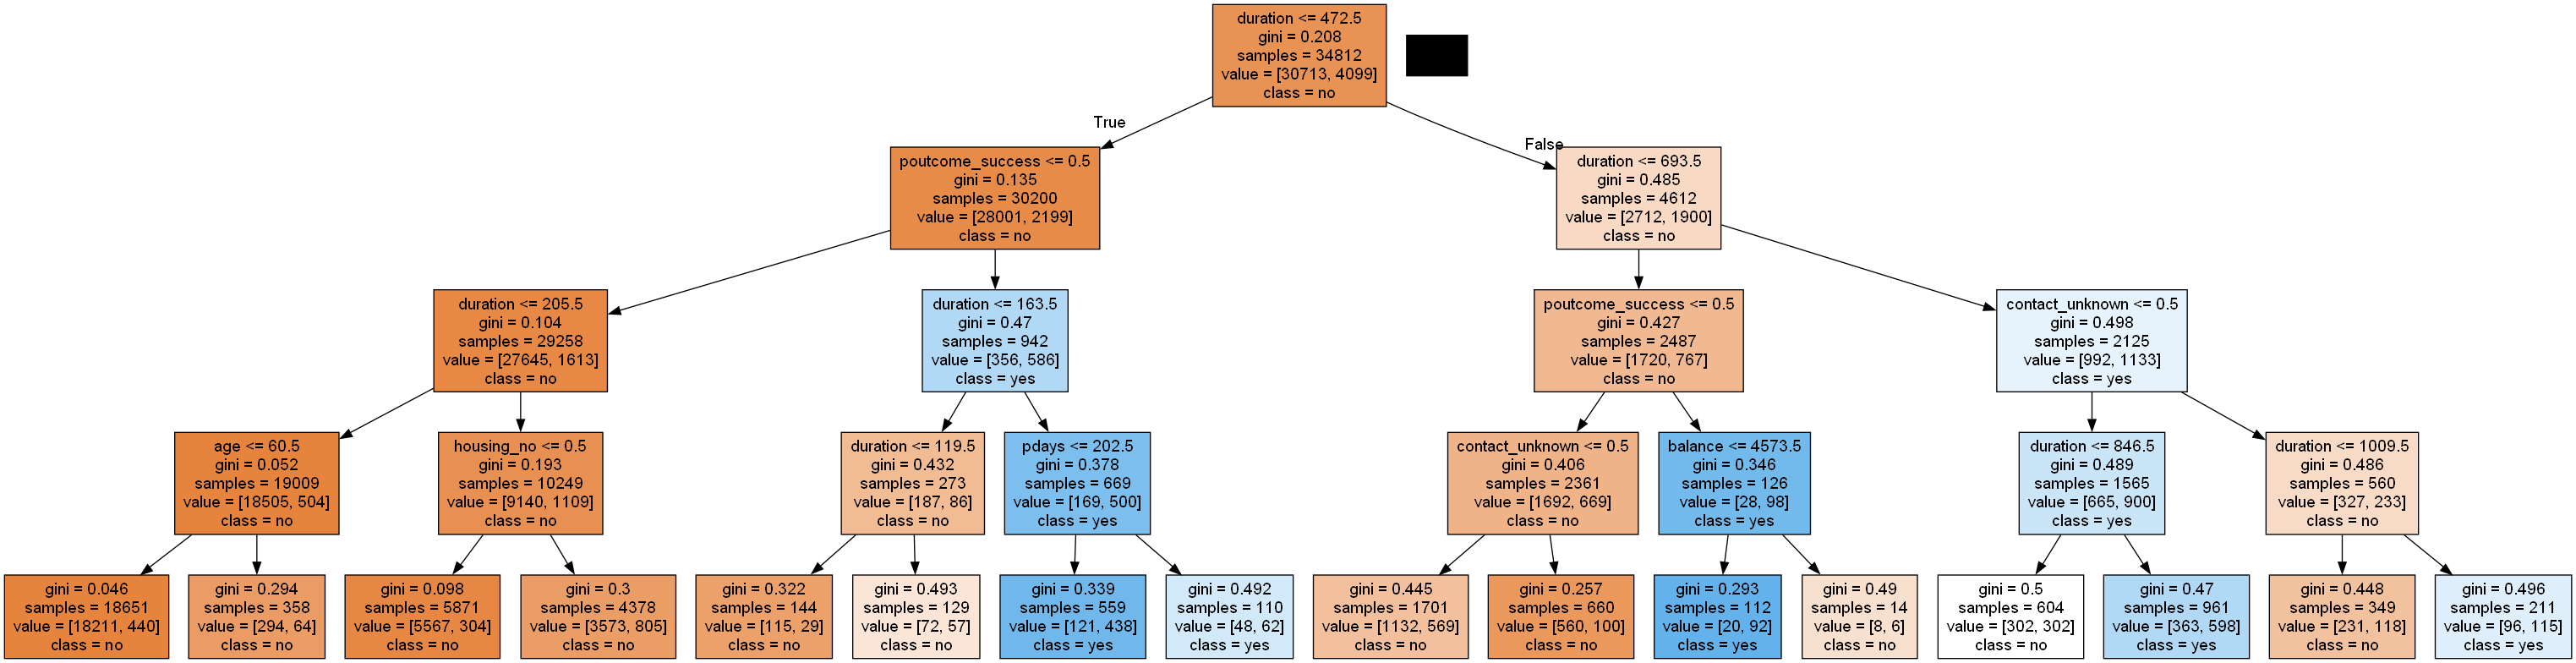

In [6]:
# grafický výstup 

dot_data = StringIO() 

export_graphviz(clf_tree, out_file=dot_data, filled=True, feature_names=list(encoder.get_feature_names_out()) +  var_numeric, class_names=["no", "yes"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png()) 

[[12917   292]
 [ 1173   538]]


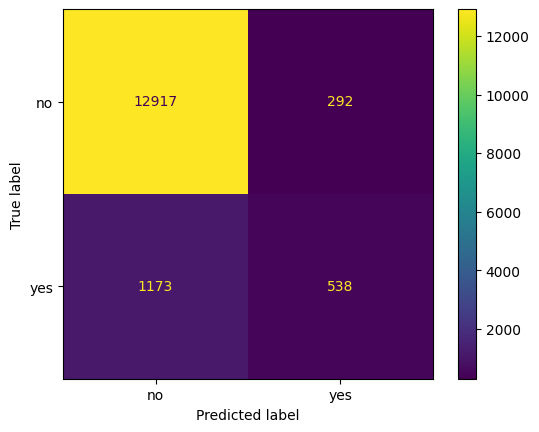

In [7]:
# matice záměn 

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf_tree, X_test, y_test)

In [8]:
# metrika accuracy

clf_tree_acc = accuracy_score(y_test, y_pred)

print(f"Accuracy_score Model Rozhodovací strom je {clf_tree_acc}.")

# Accuracy_score Model Rozhodovací strom je 0.9018096514745308.


Accuracy_score Model Rozhodovací strom je 0.9018096514745308


Pro splnění úkolu je třeba provést následující body.

- Vedení marketingového oddělení banky rozhodlo, že chce využít strojové učení k efektivní kampani. Chce ale vybrat nejlepší algoritmus, který bude predikovat, kdo z klientů má o termínovaný účet zájem. Následně bude kontaktovat ty, u kterých model predikuje zájem, a nebude kontaktovat ty, u kterých model bude predikovat nezájem. Algoritmus bude vybrán na základě jedné z metrik, které jsme si ukazovali na 9. lekci. Vedení marketingového oddělení se chce vyhnout zbytečnému kontaktování klientů, kteří o termínovaný účet nemají zájem. Nevadí, pokud se neozvou někomu, kdo o termínovaný vklad zájem má. Vyber podle této preference vedení vhodnou metriku. Metriku napiš jako komentář v programu nebo jej doplň do buňky v Jupyter notebooku.


1.  Precision: 
- Tato metrika penalizuje označení klienta, který říká NE term.účtu, jako klienta, který říká ANO term.účtu. Čím více klientů, kteří říkají NE term.účtu, označíme jako klienty, kteří říkají ANO term.účtu, tím má metrika menší hodnotu. Metrika nepočítá s tím, kolik klientů, kteří říkají ANO term.účtu jsme označili jako klienty, kteří říkají NE term.účtu.

Pro splnění úkolu je třeba provést následující body.

- Vypočítej hodnotu vybrané metriky pro rozhodovací strom, který byl vytvořen v prvním bodě.


In [9]:
# metrika precision - čím více skut. ne ozn. za predikt. ano tím je score menší 

clf_tree_pre = precision_score(y_test, y_pred, pos_label="yes")

print(f"Precision_score Model Rozhodovací strom je {clf_tree_pre}.")

# Precision_score Model Rozhodovací strom je 0.6481927710843374.

Precision_score Model Rozhodovací strom je 0.6481927710843374


Pro splnění úkolu je třeba provést následující body.

- done
- Využij algoritmus K Nearest Neighbours k predikci, zda si klient/klientka založí termínovaný účet. Využij všechny vstupní proměnné, s výjimkou proměnných `day` a `month`. Kategoriální proměnné uprav pomocí `OneHotEncoder` (tj. stejně jako u rozhodovacího stormu). Na číselné proměnné tentokrát použij StandardScaler. Pomocí cyklu (nebo pomocí GridSearchCV) urči počet uvažovaných sousedů, které algoritmus bere v úvahu. Uvažuj následující hodnoty parametru: 3, 7, 11, 15, 19, 23. Jaká je nejlepší hodnota metriky? A je lepší než u rozhodovacího stromu?


In [10]:
# definice proměnných: X - vstupní proměnná , y - cílová proměnná, K Nearest Neighbours

var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"] 
var_numeric = ["age", "balance", "duration", "pdays", "previous"] 

# přeměna var_kategorical

encoder = OneHotEncoder()
encoded_var = encoder.fit_transform(data_base[var_categorical])
encoded_var = encoded_var.toarray()

# přeměna var_numeric - StandardScaler

scaler = StandardScaler()
numeric = scaler.fit_transform(data_base[var_numeric])

X = np.concatenate([encoded_var, numeric], axis=1)
y= data_base["y"]

In [11]:
# rozdělení dat na testovací a trénovací sadu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

klasifikátor - K Nearest Neighbours parametry - 3, 7, 11, 15, 19, 23. cyklus, metrika precision_score

In [13]:
# klasifikátor - K Nearest Neighbours parametry - 3, 7, 11, 15, 19, 23. cyklus, metrika precision_score

ks = [3, 7, 11, 15, 19, 23]

precision_scores = []

for k in ks:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(X_train, y_train)
    y_pred = clf_knn.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, pos_label="yes"))

best_precision_score = max(precision_scores)
best_k = ks[precision_scores.index(best_precision_score)]    

print(f"Nejlepší hodnota metriky Precision_score je {best_precision_score}.")
print(f"Příslušná hodnota parametru k je {best_k}.")

# Nejlepší hodnota metriky Precision_score je 0.6301546391752577.
# Příslušná hodnota parametru k je 23.


Nejlepší hodnota metriky Precision_score je 0.6301546391752577.
Příslušná hodnota parametru k je 23.


Komentář - výsledky od tohoto momentu (KNN cyklus) se mi liší od hodnot uvedených v nápovědě. Snažila jsem se přijít na to proč. Odevzdávám úkol. Nicméně prosím o komentář proč mi vycházejí jiné hodnoty. Co mělo být případně jinak. Děkuji. Iva

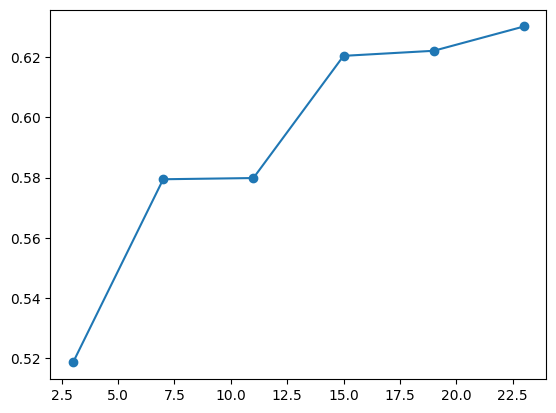

In [19]:
import matplotlib.pyplot as plt
plt.plot(ks, precision_scores, marker="o")


K Nearest Neighbours parametry - 3, 7, 11, 15, 19, 23. GridSearchCV, metrika precision_score

In [21]:
# klasifikátor - K Nearest Neighbours parametry - 3, 7, 11, 15, 19, 23. GridSearchCV

from sklearn.metrics import make_scorer

model_1 = KNeighborsClassifier() # Definice klasifikátoru
params_1 = {"n_neighbors": [3, 7, 11, 15, 19, 23]} # Definice parametrů pro prohledávání

scorer_pre = make_scorer(precision_score, pos_label="yes") # Definice metriky pro GridSearchCV

clf_1 = GridSearchCV(model_1, params_1, scoring=scorer_pre) # Vytvoření objektu GridSearchCV

clf_1.fit(X, y) # Provedení prohledávání

# Výpis nejlepších parametrů a přesnosti
print("Nejlepší parametry:", clf_1.best_params_)
print("Nejlepší přesnost:", round(clf_1.best_score_, 2))

# Nejlepší parametry: {'n_neighbors': 19}
# Nejlepší přesnost: 0.56


Nejlepší parametry: {'n_neighbors': 19}
Nejlepší přesnost: 0.56


Pro splnění úkolu je třeba provést následující body.

- Jako druhý využij algoritmus Support Vector Machine. Využij lineární verzi, tj. `LinearSVC`. Algoritmus využij s výchozími hodnotami parametrů, tj. nemusíš zkoušet různé hodnoty parametrů. Vypočti hodnotu požadované metriky.


In [22]:
# definice proměnných: X - vstupní proměnná , y - cílová proměnná, LinearSVC

var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"] 
var_numeric = ["age", "balance", "duration", "pdays", "previous"] 

# přeměna var_kategorical

encoder = OneHotEncoder() 
encoded_var = encoder.fit_transform(data_base[var_categorical])
encoded_var = encoded_var.toarray()

# přeměna var_numeric - StandardScaler

scaler = StandardScaler()
numeric = scaler.fit_transform(data_base[var_numeric])

X = np.concatenate([encoded_var, numeric], axis=1) # vstupní proměnná
y= data_base["y"] # cílová proměnná

# rozdělení dat na testovací a trénovací sadu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# klasifikátor - LinearSVC parametry - výchozí hodnoty

from sklearn.svm import LinearSVC, SVC

clf_svc = LinearSVC()
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

c:\Users\Iva_S\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
# závěrečná predikce - Accuracy_score/Precision_score

clf_svc_acc = accuracy_score(y_test, y_pred)
clf_svc_pre = precision_score(y_test, y_pred, pos_label="yes")

print(f"Accuracy_score Model Support Vector Machine je {clf_svc_acc}")
print(f"Precision_score Model Support Vector Machine je {clf_svc_pre}")

# Accuracy_score Model Support Vector Machine je 0.9016756032171582
# Precision_score Model Support Vector Machine je 0.6605263157894737


Accuracy_score Model Support Vector Machine je 0.9016756032171582
Precision_score Model Support Vector Machine je 0.6605263157894737


Pro splnění úkolu je třeba provést následující body.

- Porovnej hodnoty metrik pro rozhodovací strom, K Nearest Neighbours a Support Vector Machine. Ve kterém z bodů jsme dosáhli nejvyšší hodnoty metriky?




| Metrika     | Tree | KNN | SVC |
| ---------------- | ---- |-------- | ----:|
| Accuracy_score   | 0.90 |         | 0.90 |
| Precision_score  | 0.65 | 0.56/19 | 0.66 |



Pro splnění úkolu je třeba provést následující body.


- Bonus: Pomocí cyklu vyzkoušej další možné výšky rozhodovacího stromu, například v rozmezí 5 až 12.


In [25]:
# klasifikátor - rozhodovací strom

var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"] 
var_numeric = ["age", "balance", "duration", "pdays", "previous"] 

# přeměna var_kategorical
encoder = OneHotEncoder()

encoded_var = encoder.fit_transform(data_base[var_categorical])
encoded_var = encoded_var.toarray()

# přeměna var_numeric - StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(data_base[var_numeric])

X = np.concatenate([encoded_var, numeric], axis=1) # vstupní proměnná
y= data_base["y"] # cílová proměnná

# rozdělení dat na testovací a trénovací sadu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# klasifikátor - DecisionTreeClassifier - depth (5, 6, 7, 8, 9, 10, 11, 12) cyklus
# precision_score

dep = [5, 6, 7, 8, 9, 10, 11, 12]
precision_scores = []

for k in dep:
    clf_tree_2 = DecisionTreeClassifier(max_depth=k)
    clf_tree_2.fit(X_train, y_train)
    y_pred = clf_tree_2.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, pos_label="yes"))

best_precision_score_tree = max(precision_scores)
best_k_tree = dep[precision_scores.index(best_precision_score_tree)]    

print(f"Nejlepší hodnota metriky Precision_score je {best_precision_score_tree}.")
print(f"Příslušná hodnota parametru k je {best_k_tree}.")

# Nejlepší hodnota metriky Precision_score je 0.6220703125.
# Příslušná hodnota parametru k je 8.


Nejlepší hodnota metriky Precision_score je 0.6220703125.
Příslušná hodnota parametru k je 8.


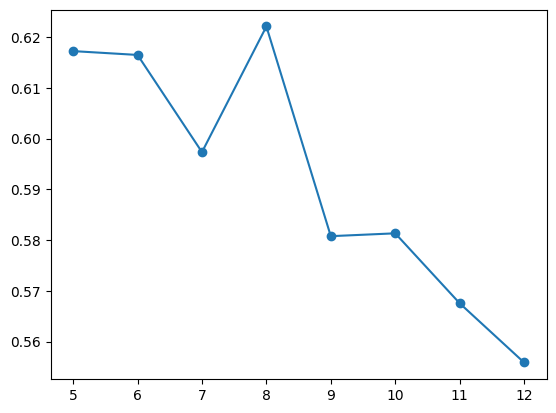

In [27]:
plt.plot(dep, precision_scores, marker="o")

## Nápověda

Níže je načtení dat. V případě rozhodovacího stromu není potřeba používat scaler, data pouze převedeme na matici. Tento postup jsme si ukazovali na 10. lekci.

In [ ]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

data = pandas.read_csv("ukol_04_data.csv")
data.head()

In [ ]:
import numpy

y = data["y"]

categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"]
numeric_columns = ["age", "balance", "duration", "pdays", "previous"]
numeric_data = data[numeric_columns].to_numpy()

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

U funkce `export_graphviz` je třeba spojit popisky z encoder a názvy sloupců dohromady, abychom získali data ke všem sloupcům, které nyní máme

```py
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=list(encoder.get_feature_names_out()) + numeric_columns, class_names=["no", "yes"])
```

Vzniklý strom je zde:

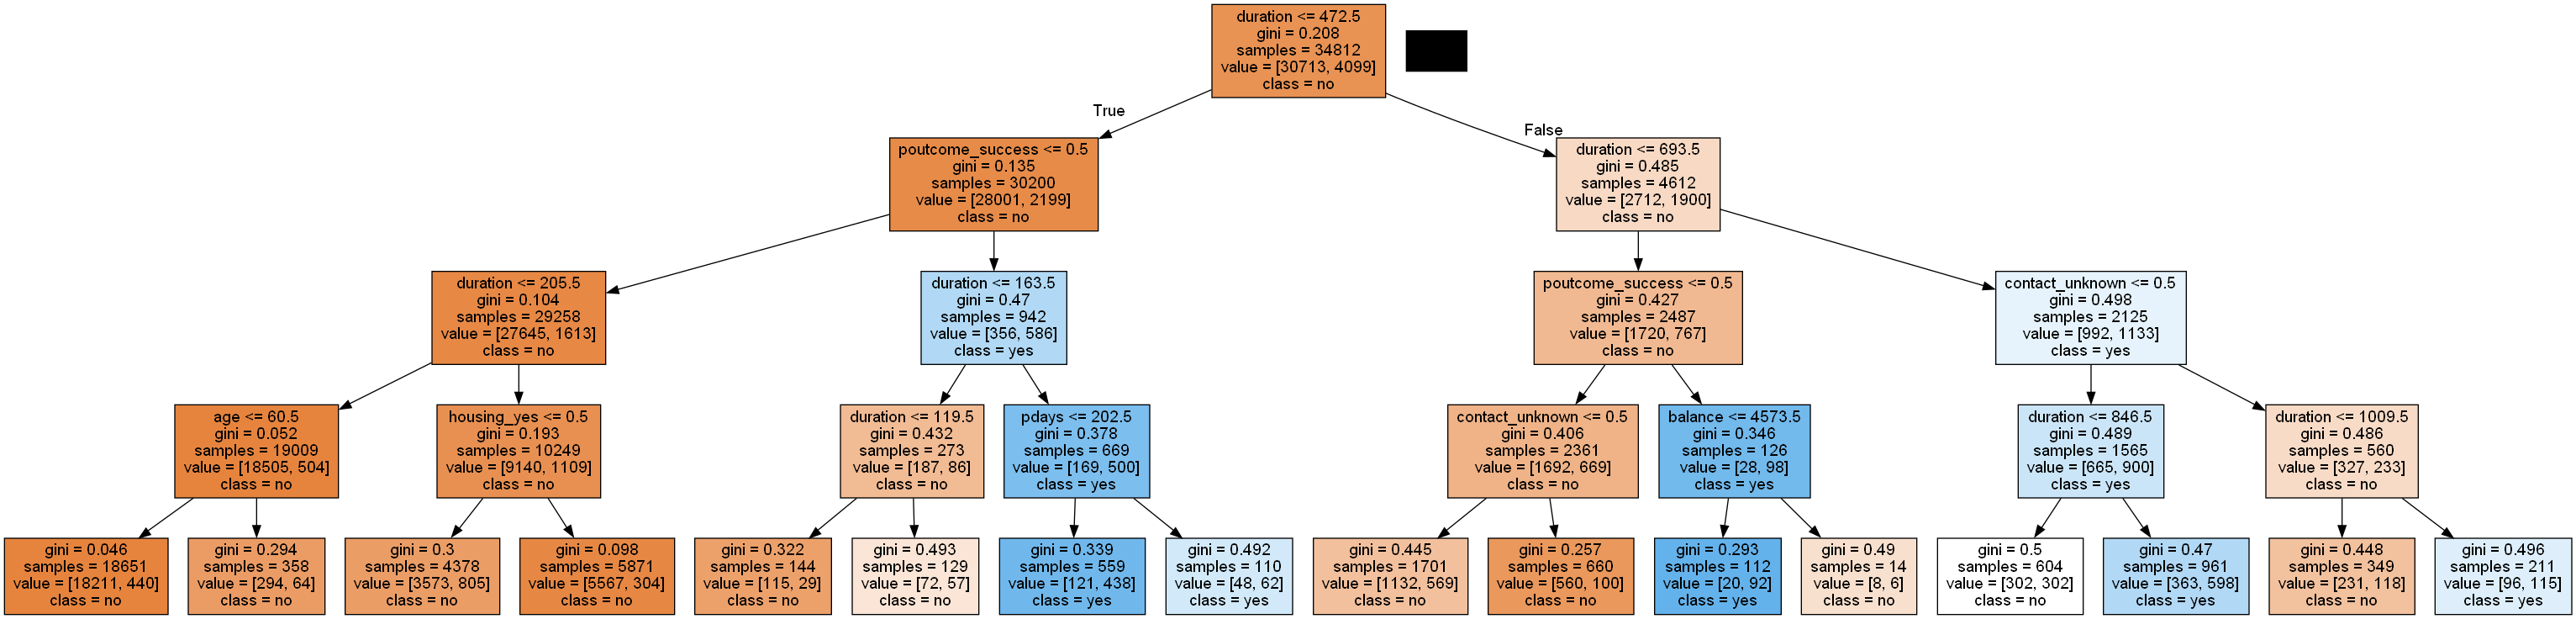

Matice záměn je níže

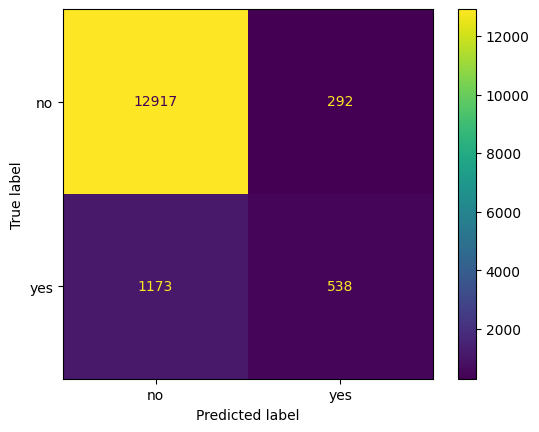

Pro další dva algoritmy již musíme použít i `StandardScaler` a propojit obě pole dohromady.

In [ ]:
scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Hodnota metriky `accuracy` je přibližně 90 %.

Hodnota metriky, která je důležitá pro vedení marketingového oddělení, je přibližně 65 %.

Pokud použiješ cyklus, je v případě KNN nejlepší hodnota pametru 25, požadovaná metrika je přibližně 55 %.

V případě `LinearSVC` se může zobrazit zpráva `ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.`. Tu můžeš ignorovat. Požadovaná metrika je přibližně 84 %.

Pokud vyzkoušíš maximální výšky stromu v rozmězí 5 až 12, hodnota metriky bude vždy menší než v případě `LinearSVC`.

### EDIT 2023-06-13

Pozor na to, že při použití `GridSearchCV` budete mít výsledky jiné. Ty uvedené se vztahují k použití cyklu. `GridSearchCV` postupuje trochu jinak při hledání, vícekrát zkouší různá rozdělení na trénovací a testovací data a tím pádem jsou jeho výsledky méně ovlivněné tím, jak jsou data rozdělena.

Plus optimální výsledek není 25 (což chybí v parametrech, které máte brát v úvahu), ale 23.